## Question-1.
#### Download the fashion-MNIST dataset and plot 1 sample image for each class as shown in the grid below.

* Importing the neccesary libraries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

* Loading the dataset

In [ ]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
y_train.shape

(60000,)

* Class labels of the sample images

In [ ]:
class_labels=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

* Using a for loop to get one sample per class and storing the images and the labels in two lists

In [ ]:
sample_img=[]
sample_labels=[]
for i in range(len(class_labels)):
    index = np.argmax(y_train == i)
    # index =np.where(y_train==i)[0][0]
    sample_img.append(x_train[index])
    sample_labels.append(class_labels[i])

In [ ]:
print(len(sample_labels))
print(len(sample_img))

10
10


* Plotting 1 sample image of each class

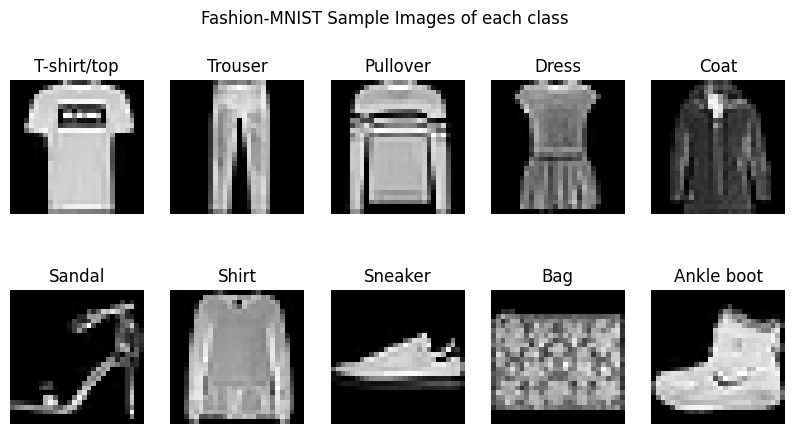

In [ ]:
fig, axes = plt.subplots(2,5,figsize=(10,5))
fig.suptitle("Fashion-MNIST Sample Images of each class", fontsize=12)

for i, ax in enumerate(axes.flat):
    ax.imshow(sample_img[i], cmap='gray')
    ax.set_title(sample_labels[i])
    ax.axis('off')

plt.show()

## Question-2
##### Implement a feedforward neural network which takes images from the fashion-mnist data as input and outputs a probability distribution over the 10 classes.

#### Initialization of weights and biases

In [1]:
def init_weights(layers):
    np.random.seed(0)
    weights ={}
    biases ={}
    for i in range(len(layers)-1):
        weights[i] = np.random.randn(layers[i],layers[i+1])
        biases[i] = np.zeros((1,layers[i+1]))
    return weights, biases

1. Sigmoid has been used as an activation.
2. Derivative of the sigmoid function
3. Softmax function as an output layer activation function layer neuron for computing the probabilities of the 10 classes

* These three functions is defined below:

In [3]:
def sigmoid(z):
  return 1/(1+ np.exp(-z))

def Derivative_of_Sigmoid(z):
  return sigmoid(z)*(1-sigmoid(z))

def softmax(z):
  return  np.exp(z)/np.sum(np.exp(z),axis=0)

#### Forward propagation:
* here "layers" is a list. length of the list is the number of layers and the value in each list element have, denotes the number of neurons.

In [4]:
def forward_NN(X,weights,biases,layers):
    activations={0:X}
    for i in range(len(layers)-2):
        X = sigmoid(np.dot(X,weights[i])+ biases[i])
        activations[i+1] = X
    output = softmax(np.dot(X,weights[len(layers)-2])+ biases[len(layers)-2])
    activations[len(layers)-1] = output
    return activations

#### Backpropagation(Gradient Descent)

In [5]:
def backward_NN(X,y,activations,weights,biases,layers,learning_rate):
    grads ={}
    L =len(layers)-1
    m = X.shape[0]
    dZ = activations[L] - y
    for i in reversed(range(L)):
        grads[f'dw{i}'] = np.dot(activations[i].T,dZ)/m
        grads[f'db{i}'] = np.sum(dZ,axis=0,keepdims=True)/m
        if i >0:
            dA= np.dot(dZ,weights[i].T)
            dZ = dA*Derivative_of_Sigmoid(activations[i])
    for i in range(L):
        weights[i] -= learning_rate*grads[f'dw{i}']
        biases[i] -= learning_rate*grads[f'db{i}']
    return weights,biases

#### Training the Neural-Network and Prediction:

In [18]:
def train_NN(X_train, y_train, layers, learning_rate=0.01, epochs=10, batch_size=32):
    weights, biases = init_weights(layers)
    for i in range(epochs):
        for j in range(0, X_train.shape[0], batch_size):
            X_batch = X_train[j:j+batch_size]
            y_batch = y_train[j:j+batch_size]
            activations = forward_NN(X_batch,weights,biases,layers)
            weights, biases = backward_NN(X_batch, y_batch, activations, weights, biases, layers, learning_rate=learning_rate)
        y_pred = predict_NN(X_train, weights, biases, layers)
        loss = -np.mean(y_train*np.log(y_pred+1e-8))
        acc = np.mean(np.argmax(y_train, axis=1) == np.argmax(y_pred, axis=1))
        print(f"Epoch {i+1}/{epochs} loss: {loss:.2f} accuracy: {acc:.2f}")
    return weights, biases

In [6]:
def predict_NN(X, weights, biases, layers):
    return forward_NN(X, weights, biases, layers)[len(layers) - 1]

#### Evaluation

In [8]:
def evaluate_nn(X_test, y_test, weights, biases, layers):
    y_pred = predict_NN(X_test, weights, biases, layers)
    accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1))
    print(f"Test Accuracy: {accuracy:.4f}")

#### Preparing the data for training and making prediction:

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
# from keras.datasets import fashion_mnist

# Load Fashion-MNIST dataset from Keras
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values (scale to [0,1])
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten images (convert 28x28 to 784)
X_train = x_train.reshape(x_train.shape[0], -1)
X_test = x_test.reshape(x_test.shape[0], -1)

# One-hot encode labels
# Remove 'sparse=False' or upgrade scikit-learn
ohe = OneHotEncoder(sparse_output=False,categories='auto') # For older versions, remove sparse or set categories='auto'
#ohe = OneHotEncoder(sparse_output=False)  # For scikit-learn >= 1.2 use sparse_output
y_train = ohe.fit_transform(y_train.reshape(-1, 1))
y_test = ohe.transform(y_test.reshape(-1, 1))

# Split dataset (optional, if you want a validation set)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Print dataset shapes
print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", x_test.shape, y_test.shape)

Train shape: (54000, 784) (54000, 10)
Validation shape: (6000, 784) (6000, 10)
Test shape: (10000, 28, 28) (10000, 10)


* Define a network and Train

In [19]:
layers = [784, 2, 2, 10]
weights, biases = train_NN(X_train, y_train, layers, epochs=10, batch_size=64, learning_rate=0.01)

# Evaluate on test data
evaluate_nn(X_test, y_test, weights, biases, layers)

Epoch 1/10 loss: 1.09 accuracy: 0.17
Epoch 2/10 loss: 1.09 accuracy: 0.10
Epoch 3/10 loss: 1.09 accuracy: 0.10
Epoch 4/10 loss: 1.09 accuracy: 0.10


<ipython-input-3-2f8554132f16>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+ np.exp(-z))


Epoch 5/10 loss: 1.09 accuracy: 0.10
Epoch 6/10 loss: 1.09 accuracy: 0.10
Epoch 7/10 loss: 1.09 accuracy: 0.10
Epoch 8/10 loss: 1.09 accuracy: 0.10
Epoch 9/10 loss: 1.09 accuracy: 0.10
Epoch 10/10 loss: 1.09 accuracy: 0.10
Test Accuracy: 0.1000
